## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below.

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps:
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features.
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable.

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

### Importing the data file

In [87]:
#import all the libraries
#Importing the data File

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv("/Users/priyamsinha/Desktop/PORTFOLIO/portfolio_3.csv")

### Exploratory Data Analysis

In [88]:
#Q1. Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values

In [89]:
# info() method to quickly inspect and summarizing the basic characterstics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   helpfulness  2685 non-null   int64  
 5   gender       2685 non-null   object 
 6   category     2685 non-null   object 
 7   item_id      2685 non-null   int64  
 8   item_price   2685 non-null   float64
 9   user_city    2685 non-null   int64  
 10  rating       2685 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 230.9+ KB


In [90]:
# Explore the dataset
# display first 5 row head()

data.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


In [91]:
#Data Processing

In [92]:
# finding if there is any missing value or not
data.isna().sum()
data.isnull().sum()

# It appears that there are no missing values in any of the columns of your dataset
#No NA values are there.

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64

In [93]:
data.nunique()

userId          267
timestamp       844
review         2675
item             82
helpfulness       2
gender            2
category          9
item_id          82
item_price       77
user_city        40
rating            2
dtype: int64

### Analysis-: There are 267 uniqe users across 40 cities #in 2685 entries of rating. There are 82 Unique items across the 9 Categories.
 ### Analysis: Checking the type of variable.
 
1. Ordered Categorical Variable -: Rating, helpfulness - Label encoding
2. Unordered categorical variable -: city, item id or item, category, gender - Dummy vaiable   
3. Numerical Vriable -: price, userid, timestamp
4. Binary-: Gender

In [94]:
Common_reviews  = data.review.value_counts()
Common_reviews[ Common_reviews > 1 ]

review
Being John Malkovich        3
The Matrix is awesome...    2
Dogma is no dog             2
Great movie!                2
brad's Experience           2
Hey Howdy Hey!!!            2
Southwest Airlines          2
The Sixth Sense (1999)      2
Funny Movie                 2
Name: count, dtype: int64

### There are some Common reviews in the data that's why reviews are repeating.

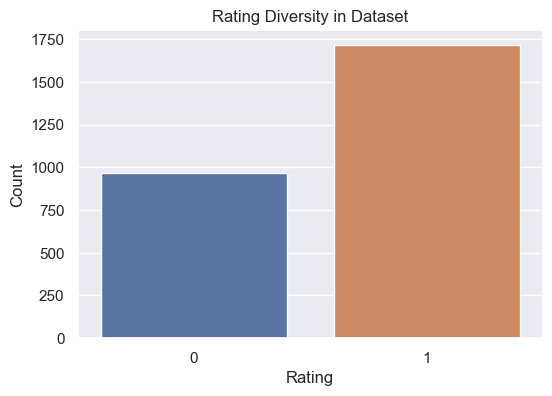

In [95]:
data.rating.value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(6, 4))
sns.countplot(data = data, x = data.rating, label = "Counts of Rating")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Diversity in Dataset')


# Show the plot
plt.show()


### Analysis -: The Rating of like and dislikes is shown as in countplot. The data set is imbalanced with more of likes and less of dislikes. For this we will do stratified sampling so that during modelling our model is trained for both cases**

In [96]:
#Data Pre-Processing Stage 
#Q2Convert object features into digit features by using an encoder
#Preprocessing the Variables for using it in Linear Regression Model
from sklearn.preprocessing import OrdinalEncoder



ord_enc = OrdinalEncoder()
data["category_code"] = ord_enc.fit_transform(data[["category"]])
print(data[["category", "category_code"]].head(5))
print("-----------------------------------------")

data["review_code"] = ord_enc.fit_transform(data[["review"]])
print(data[["review", "review_code"]].head(5))
print("-----------------------------------------")

data["gender_code"] = ord_enc.fit_transform(data[["gender"]])
print(data[["gender", "gender_code"]].head(5))
print("-----------------------------------------")


                category  category_code
0  Restaurants & Gourmet            8.0
1  Restaurants & Gourmet            8.0
2  Restaurants & Gourmet            8.0
3                 Movies            5.0
4                 Movies            5.0
-----------------------------------------
                                            review  review_code
0                                Not always McCrap       1618.0
1  I dropped the chalupa even before he told me to       1125.0
2                     The Wonderful World of Wendy       2185.0
3                             They actually did it       2243.0
4                             Hey! Gimme some pie!       1033.0
-----------------------------------------
  gender  gender_code
0      M          1.0
1      M          1.0
2      M          1.0
3      M          1.0
4      M          1.0
-----------------------------------------


/Users/priyamsinha/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


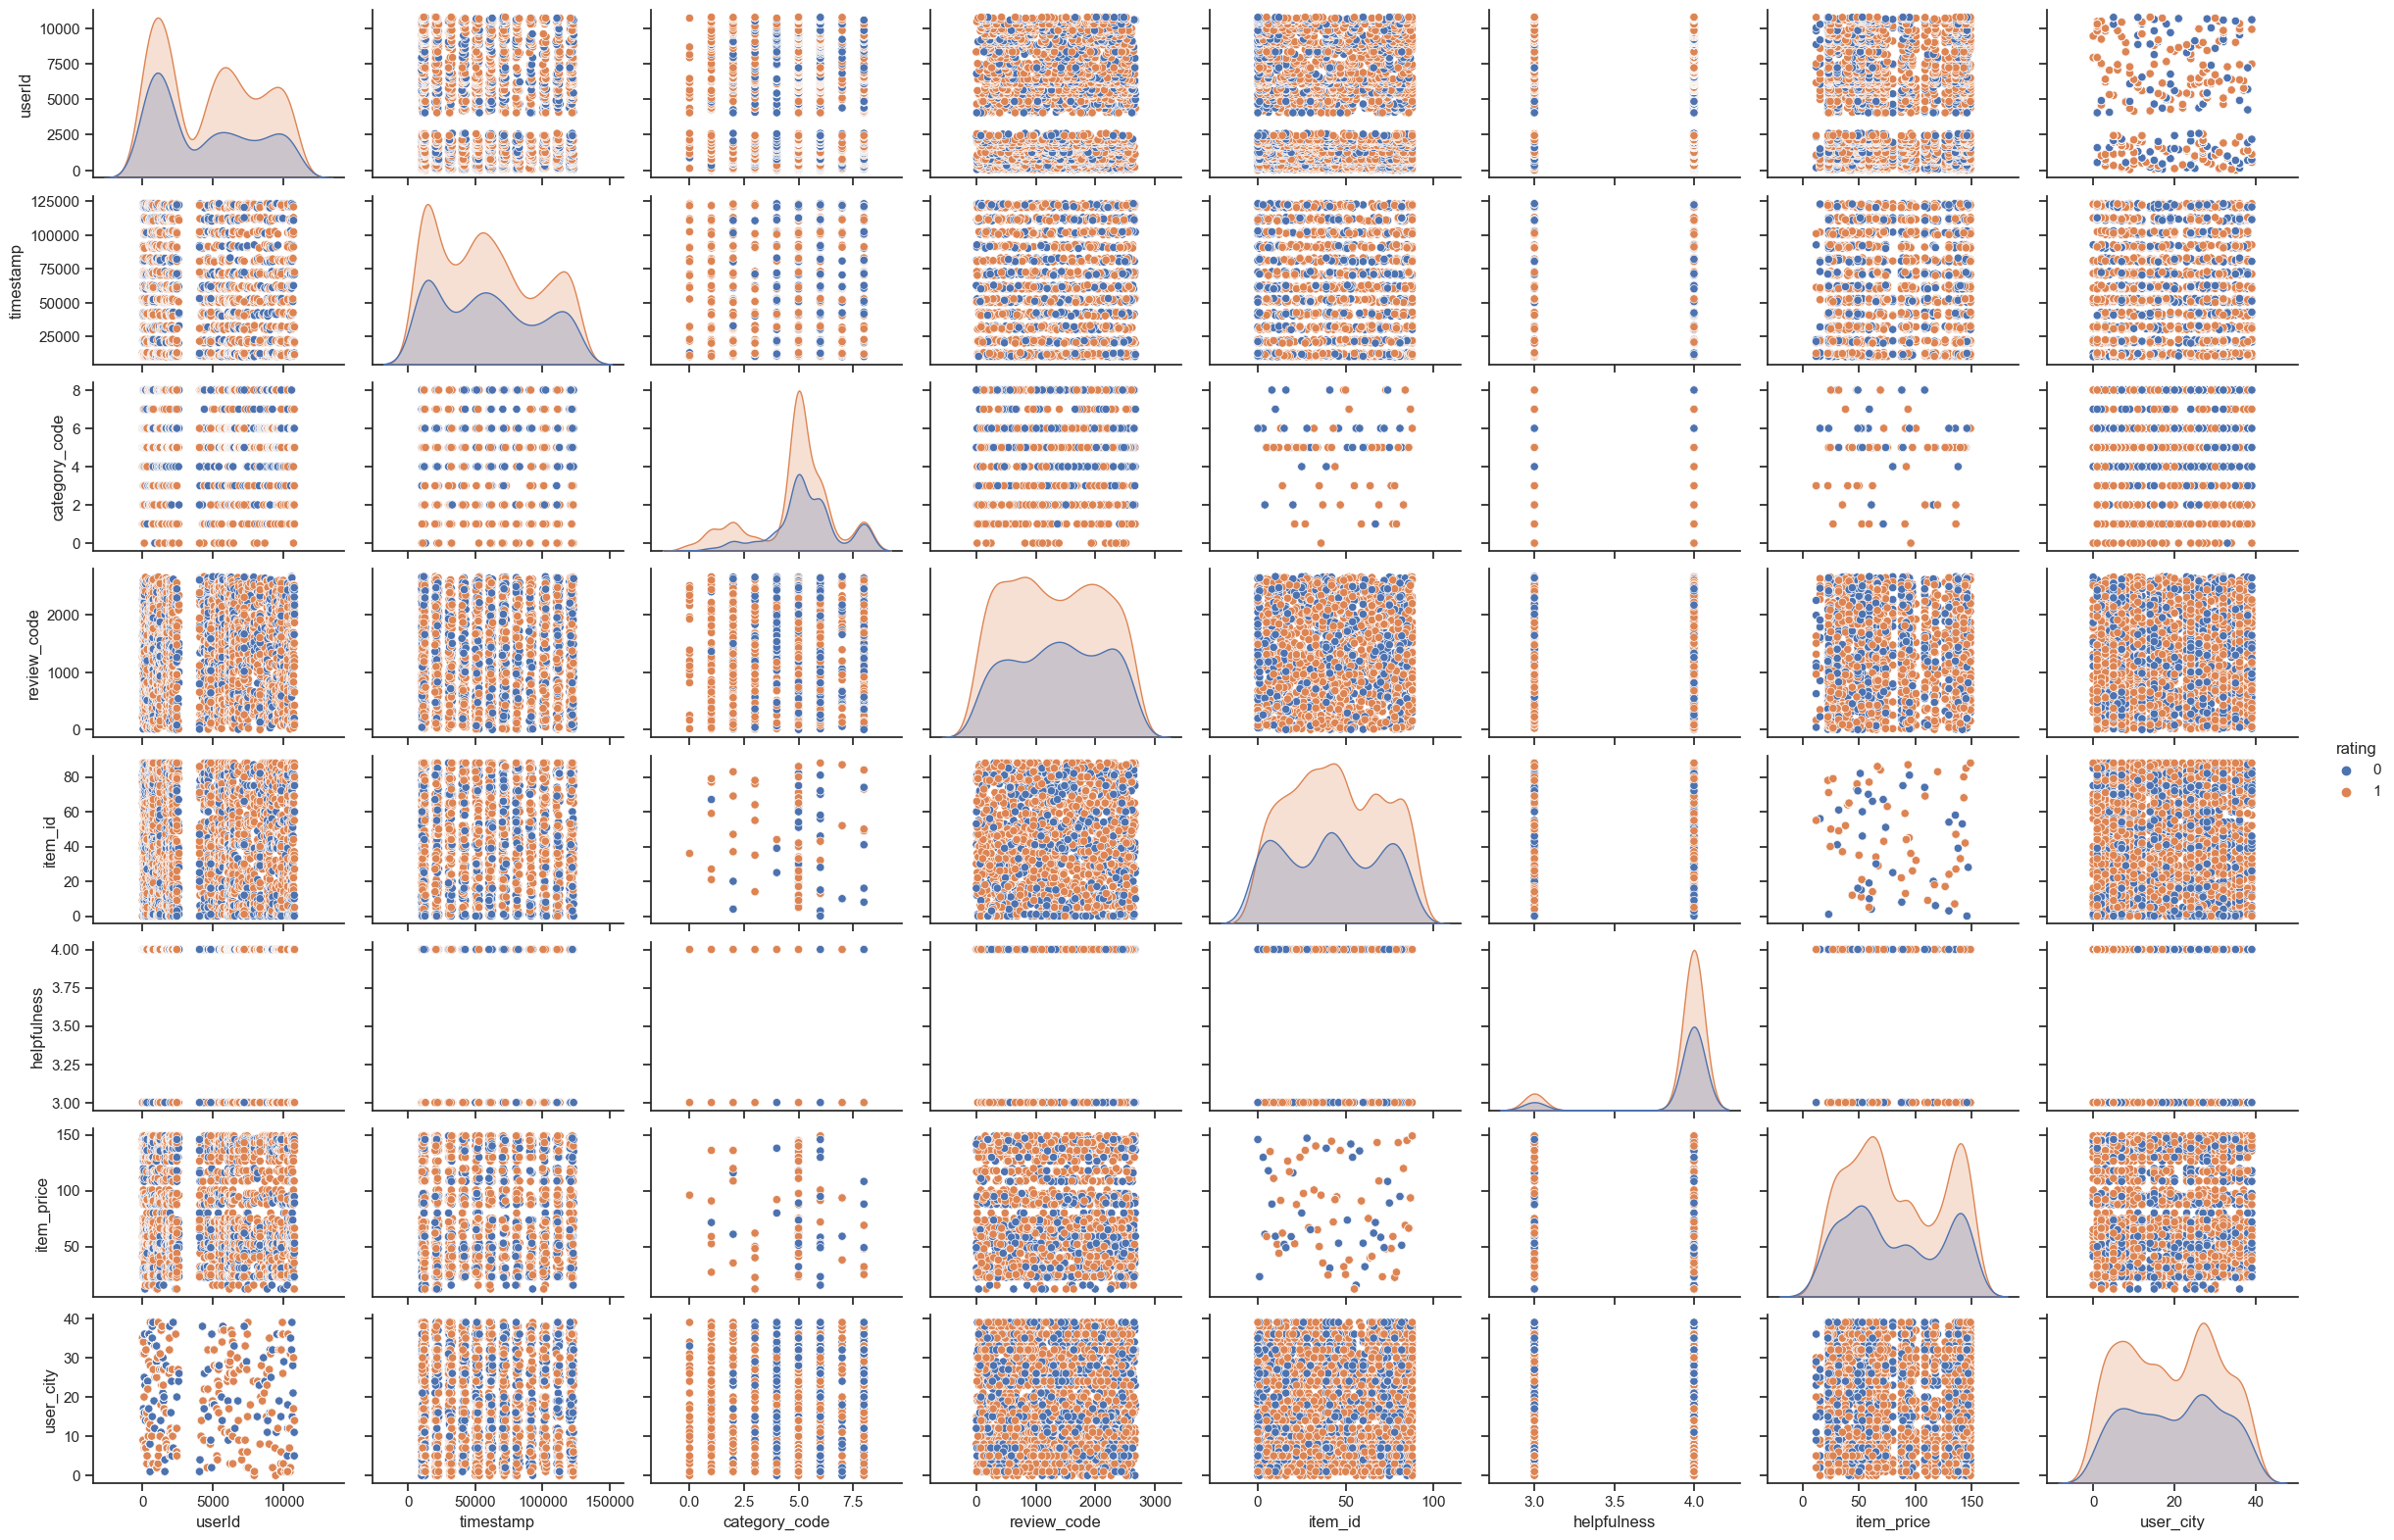

In [97]:
#Q3 Study the correlation between these features.

sns.set(style="ticks")
sns.pairplot( data[["userId","timestamp", "category_code","review_code", "item_id", "helpfulness","item_price", "user_city","rating"]], kind="scatter", diag_kind="kde", hue = "rating", markers="o", height=2, aspect=1.5)


<Axes: >

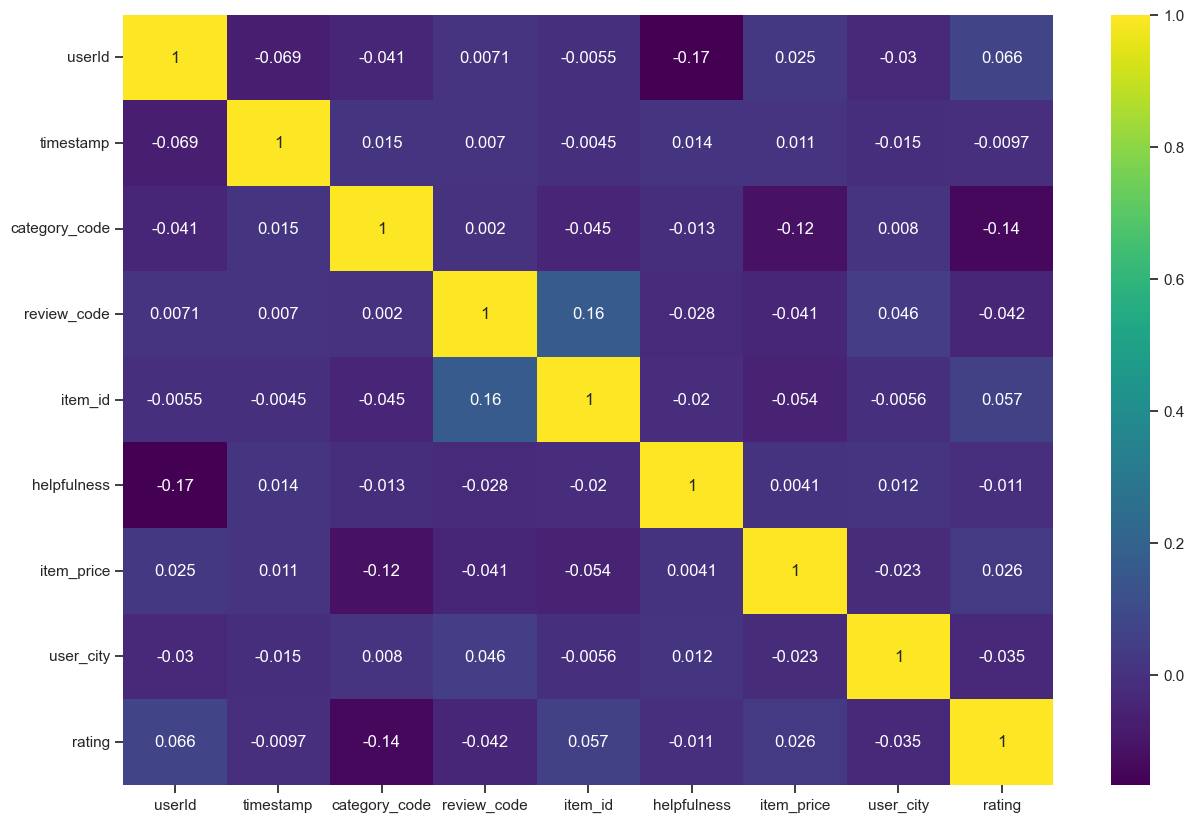

In [98]:
plt.figure(figsize=(15,10))
sns.heatmap(data= data[["userId","timestamp", "category_code","review_code", "item_id", "helpfulness","item_price", "user_city","rating"]].corr(), annot=True, cmap='viridis')

### Analysis -: Correlation plot for the independent features and the target variables. 
### The pair plot shows the correlation and distribution of the variable It further shows there's no outlier in the dataset. There's no linear direct relationship

### The rating is our target variable and among the dependent variable the feature which is most correlated are timestamp, review_Code and 

In [99]:
#Q4 Split the dataset and train a logistic regression model to predict 'rating' based on other features. 
#Evaluate the accuracy of your model. 

from sklearn.model_selection import train_test_split

print(data.shape)
X =  data[["userId","timestamp", "category_code","review_code", "item_id", "helpfulness","item_price", "user_city"]]
y =  data["rating"]

#Case 1
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['rating'], test_size=0.2, random_state=42)
# Print the shapes of the resulting sets to verify
print("Case 1: X_train shape:", X_train.shape)
print("Case 1: X_test shape:", X_test.shape)
print("Case 1: y_train shape:", y_train.shape)
print("Case 1: y_test shape:", y_test.shape)


(2685, 14)
Case 1: X_train shape: (2148, 8)
Case 1: X_test shape: (537, 8)
Case 1: y_train shape: (2148,)
Case 1: y_test shape: (537,)


In [100]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2148 entries, 1461 to 1283
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         2148 non-null   int64  
 1   timestamp      2148 non-null   int64  
 2   category_code  2148 non-null   float64
 3   review_code    2148 non-null   float64
 4   item_id        2148 non-null   int64  
 5   helpfulness    2148 non-null   int64  
 6   item_price     2148 non-null   float64
 7   user_city      2148 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 151.0 KB


### We are spiliting the dataset to the training and test data for testing and training of the model**

In [101]:
#Trainig the Logistic regression Model with all variables
#Importing the libraries and then taking class logistic regression
#creating an instance from the class
#Fitting the model/instance of the class with training data 
#Comparing the predicted values of model of test data with real values in test data and calculating accuracy and other metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6443202979515829
Confusion Matrix:
 [[  8 185]
 [  6 338]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.04      0.08       193
           1       0.65      0.98      0.78       344

    accuracy                           0.64       537
   macro avg       0.61      0.51      0.43       537
weighted avg       0.62      0.64      0.53       537



### Analysis-: Logistic regression with all independent features. The metric that we took is accuracy which comapres True Positive and true Negative with False Positive and False Negative. The accuracy is 64.43%  Logistic regression is a statistical model used for binary classification. It calculates the probability of an event occurring based on input features, making it a fundamental tool in machine learning.** 


In [102]:
#Trainig the Logistic regression Model with all variables
#Importing the libraries and then taking class logistic regression
#creating an instance from the class
#Fitting the model/instance of the class with training data 
#Comparing the predicted values of model of test data with real values in test data and calculating accuracy and other metrics



from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=15) #Taking at random K values

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.6126629422718808
Confusion Matrix:
 [[ 27 166]
 [ 42 302]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.14      0.21       193
           1       0.65      0.88      0.74       344

    accuracy                           0.61       537
   macro avg       0.52      0.51      0.47       537
weighted avg       0.55      0.61      0.55       537



### Analysis the above model is of KNN with all the independent features. K-Nearest Neighbors (KNN) is a simple supervised machine learning algorithm. It classifies data points by finding the majority class among their K closest neighbors, based on a distance metric.The accuracy is 61.26**

In [103]:
#Q6 Tune the hyper-parameter K in KNN to see how it influences the prediction performance


#Trainig the Logistic regression Model with all variables
#Importing the libraries and then taking class logistic regression
#creating an instance from the class
#Fitting the model/instance of the class with training data 
#Comparing the predicted values of model of test data with real values in test data and calculating accuracy and other metrics




from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


k_values = list(range(1, 21))  # You can adjust this range as needed

# Create a dictionary of hyperparameters to search through
param_grid = {'n_neighbors': k_values}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a GridSearchCV object to find the best K value using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best K value from the cross-validation
best_k = grid_search.best_params_['n_neighbors']

# Get the best KNN model with the best K value
best_knn_model = grid_search.best_estimator_

# Evaluate the model on the test data
test_accuracy = best_knn_model.score(X_test, y_test)

# Print the best K value and test accuracy
print("Best K:", best_k)
print("Test Accuracy:", test_accuracy)

Best K: 13
Test Accuracy: 0.6201117318435754


### Upon the cross validation with all k from 1 to 21 tunig it by every K values and then comparing the accuracy as a metric. we can say at K=13 we are getting a best model with 62.011%

In [104]:
#Trainig the Logistic regression Model with all variables
#Importing the libraries and then taking class logistic regression
#creating an instance from the class
#Fitting the model/instance of the class with training data 
#Comparing the predicted values of model of test data with real values in test data and calculating accuracy and other metrics


#Feature selection with RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


logistic_regression = LogisticRegression()

# Create an RFE selector with the logistic regression model
rfe_selector = RFE(logistic_regression, n_features_to_select = 3)

# Fit the RFE selector to the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

# Print the selected features
print("Selected Features:")
print(selected_features)

# Train a logistic regression model on the selected features
logistic_regression_selected = LogisticRegression(solver='liblinear')
logistic_regression_selected.fit(X_train[selected_features], y_train)

# Evaluate the model on the test data
accuracy = logistic_regression_selected.score(X_test[selected_features], y_test)
print("Test Accuracy:", accuracy)


Selected Features:
Index(['category_code', 'helpfulness', 'user_city'], dtype='object')
Test Accuracy: 0.6480446927374302


/Users/priyamsinha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/priyamsinha/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

### Recursive Feature Elimination (RFE) is a feature selection technique used in machine learning. It recursively removes less important features from a model, improving performance and simplifying the model. When we do the feature elimination with selected features we observed better model with increase in accuracy. It is because the Model  will give better results. The top 3 features are Category code, helpfulness and city**